In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout ,Flatten
from tensorflow.keras.utils import to_categorical
from google.colab import files
from tensorflow.keras import datasets

In [ ]:
# data = files.upload()

In [ ]:
# dataa = pd.read_csv('fashion-mnist_test.csv')

In [ ]:
# labels = dataa.iloc[:, 0].values
# images = dataa.iloc[:, 1:].values

In [ ]:
from tensorflow.keras.datasets import fashion_mnist


In [ ]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

In [ ]:
# Reshape the images.
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

In [ ]:
# # Reshape the images.
# train_images = train_images.reshape(-1, 28, 28, 1)
# test_images = test_images.reshape(-1, 28, 28, 1)

In [ ]:
train_images.shape

(60000, 28, 28, 1)

In [ ]:
test_images.shape

(10000, 28, 28, 1)

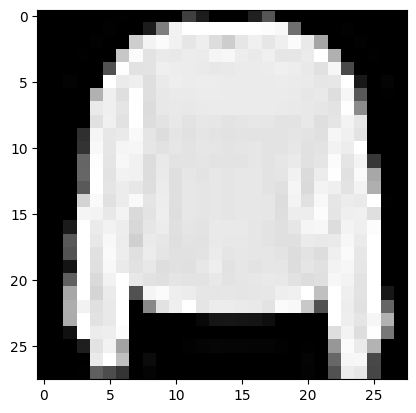

In [ ]:
plt.imshow(train_images[7],cmap='gray')

In [ ]:
train_labels[7]

2

In [ ]:
from tensorflow.keras.initializers import RandomNormal
learning_rate = 0.001
n_epochs = 6
initializer = RandomNormal(mean=0., stddev=1.)

In [ ]:
from tensorflow.keras.layers import Dropout

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout layer
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


In [ ]:
# model = Sequential([
#   Flatten(input_shape=(28, 28)),
#   Dense(64, activation='relu', kernel_initializer=initializer),
#   Dense(32, activation='relu', kernel_initializer=initializer),
#   Dense(32, activation='relu', kernel_initializer=initializer),
#   Dense(10, activation='softmax',kernel_initializer=initializer)
# ])

model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
train_labels.dtype

dtype('uint8')

In [ ]:
print("Train labels shape:", train_labels.shape)  # Should be (60000,)
print("Test labels shape:", test_labels.shape)    # Should be (10000,)


Train labels shape: (60000,)
Test labels shape: (10000,)


In [ ]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

# Compile the model
model.compile(
    optimizer='adam',
    loss=Categorical_Crossentropy(),
    metrics=['Accuracy'],
)

from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=0.00001)

# Fit the model with the callback
history = model.fit(train_images, train_labels, epochs=n_epochs, validation_data=(test_images, test_labels), callbacks=[reduce_lr])



Epoch 1/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - Accuracy: 0.7108 - loss: 0.8135 - val_Accuracy: 0.8245 - val_loss: 0.4710 - learning_rate: 0.0010
Epoch 2/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - Accuracy: 0.8184 - loss: 0.5002 - val_Accuracy: 0.8404 - val_loss: 0.4297 - learning_rate: 0.0010
Epoch 3/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - Accuracy: 0.8313 - loss: 0.4665 - val_Accuracy: 0.8506 - val_loss: 0.4056 - learning_rate: 0.0010
Epoch 4/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - Accuracy: 0.8399 - loss: 0.4379 - val_Accuracy: 0.8579 - val_loss: 0.3902 - learning_rate: 0.0010
Epoch 5/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - Accuracy: 0.8468 - loss: 0.4221 - val_Accuracy: 0.8534 - val_loss: 0.3958 - learning_rate: 0.0010
Epoch 6/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - Accuracy: 0.8481 - loss: 0.4138 - val_Accuracy: 0.8604 - val_loss: 0.3822 - learning_rate: 0.0010


In [ ]:
# Check what metrics are in the history
print(history.history.keys())


dict_keys(['Accuracy', 'loss', 'val_Accuracy', 'val_loss', 'learning_rate'])


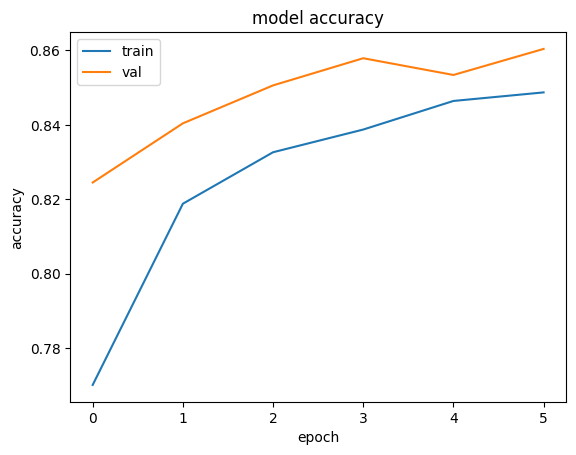

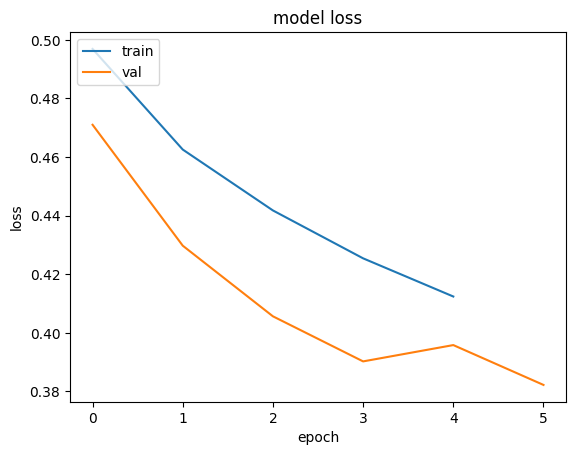

In [ ]:
plt.plot(history.history['Accuracy'])
plt.plot(history.history['val_Accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(history.history['loss'][1:])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
predictions = model.predict(test_images[:5])
print(predictions.shape)
print(predictions)


# Print our model's predictions.
print("Predictions")
print(np.argmax(predictions, axis=1))

print("Data")
# Check our predictions
print(test_labels[:5])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
(5, 10)
[[2.82777000e-06 9.30757622e-08 3.63425734e-08 2.65782631e-07
  8.54050519e-09 1.69367697e-02 3.35714532e-07 1.03015035e-01
  2.54750394e-05 8.80019128e-01]
 [1.66589325e-05 1.13424448e-09 9.97830331e-01 3.83150848e-07
  2.25609663e-04 7.64449008e-12 1.92686368e-03 2.86731796e-16
  7.54984129e-08 3.75454130e-15]
 [3.33881728e-10 1.00000000e+00 7.49367443e-11 3.45096640e-09
  1.08346647e-08 7.75124618e-26 5.82430285e-11 6.86997811e-25
  3.45525004e-15 3.80691059e-24]
 [7.37220895e-10 9.99999881e-01 2.90395173e-11 7.47341602e-08
  1.46895196e-09 1.38125898e-20 7.61213176e-11 1.29024860e-19
  1.40448823e-13 2.70145737e-19]
 [1.76447079e-01 5.65835740e-04 7.90243372e-02 7.14912498e-03
  1.42781977e-02 1.27621694e-03 7.12423861e-01 9.43646155e-05
  8.72030854e-03 2.07114499e-05]]
Predictions
[9 2 1 1 6]
Data
[9 2 1 1 6]


In [ ]:
model.evaluate(test_images,test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Accuracy: 0.8620 - loss: 0.3767


[0.3822135627269745, 0.8604000210762024]

**using filters and data augmentation**

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [ ]:
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

In [ ]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
from tensorflow.keras.initializers import RandomNormal
learning_rate = 0.001
n_epochs = 6
initializer = RandomNormal(mean=0., stddev=1.)

In [ ]:

# Build the model
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu',),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

# Display the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 142,442 (556.41 KB)

 Trainable params: 142,442 (556.41 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

# Compile the model
model.compile(
    optimizer='adam',
    loss=CategoricalCrossentropy(),
    metrics=['Accuracy'],
)

# Fit the model using the data generator
history = model.fit(
    datagen.flow(train_images, to_categorical(train_labels), batch_size=32),
    epochs=n_epochs,
    validation_data=(test_images, to_categorical(test_labels)),
)


Epoch 1/6
   1/1875 ━━━━━━━━━━━━━━━━━━━━ 1:25:28 3s/step - Accuracy: 0.1250 - loss: 49.2540

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 130s 68ms/step - Accuracy: 0.2907 - loss: 2.3350 - val_Accuracy: 0.6396 - val_loss: 0.9658
Epoch 2/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 119s 63ms/step - Accuracy: 0.6046 - loss: 1.0133 - val_Accuracy: 0.7189 - val_loss: 0.7000
Epoch 3/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 144s 64ms/step - Accuracy: 0.6730 - loss: 0.8271 - val_Accuracy: 0.7390 - val_loss: 0.6498
Epoch 4/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 118s 63ms/step - Accuracy: 0.6998 - loss: 0.7474 - val_Accuracy: 0.7588 - val_loss: 0.5801
Epoch 5/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 118s 63ms/step - Accuracy: 0.7188 - loss: 0.7095 - val_Accuracy: 0.7892 - val_loss: 0.5664
Epoch 6/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 118s 63ms/step - Accuracy: 0.7329 - loss: 0.6752 - val_Accuracy: 0.7823 - val_loss: 0.5707


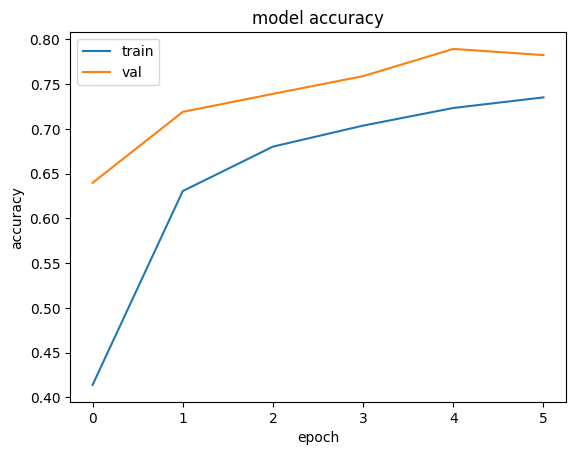

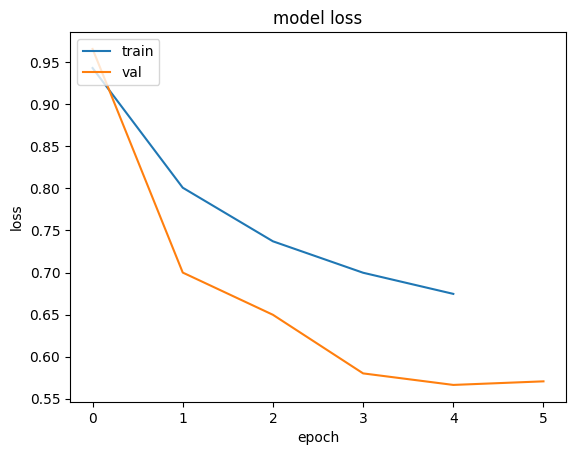

In [ ]:
plt.plot(history.history['Accuracy'])
plt.plot(history.history['val_Accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(history.history['loss'][1:])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
predictions = model.predict(test_images[:5])
print(predictions.shape)
print(predictions)


# Print our model's predictions.
print("Predictions")
print(np.argmax(predictions, axis=1))

print("Data")
# Check our predictions
print(test_labels[:5])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
(5, 10)
[[1.1613745e-10 2.4606850e-10 5.1973898e-14 9.4016772e-10 3.2519753e-12
  4.9453983e-03 1.2883501e-13 2.1184253e-02 1.3780162e-08 9.7387040e-01]
 [1.3548108e-02 1.3666279e-05 8.3515245e-01 1.1525910e-03 1.9545611e-02
  5.2007013e-06 1.2966019e-01 1.1530686e-06 8.7689061e-04 4.4148663e-05]
 [1.6048962e-10 9.9999976e-01 3.8017484e-10 8.4426198e-08 7.1424815e-08
  2.8177998e-09 6.2899963e-11 8.2798004e-15 8.3346878e-11 3.7646326e-09]
 [1.6064582e-10 9.9999976e-01 1.6067256e-09 1.3553918e-07 6.1944029e-08
  3.5966710e-10 1.5777289e-10 5.7556054e-17 3.0835276e-10 5.6457634e-11]
 [3.6455402e-01 4.0336484e-03 2.0353910e-01 7.8799427e-02 4.4840578e-02
  3.6301208e-04 2.9457918e-01 6.2317798e-05 7.9357941e-03 1.2928832e-03]]
Predictions
[9 2 1 1 0]
Data
[9 2 1 1 6]
